# Importing data and required libraries 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# from pandas_profiling import ProfileReport
# import json # to convert jason data to python objects
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data

# Reading directly from the google drive (https://stackoverflow.com/a/62592638)
# url = "https://drive.google.com/file/d/11EWis82Vkogzg97512UO1aWotUEF1Jub/view?usp=sharing"
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# df = pd.read_csv(path)

df = pd.read_csv("./data/imdb.csv",parse_dates=['release_date'])

# EDA and Data cleaning

## A quick review of data

1. A quick dive into data

In [3]:
df.shape

(3000, 23)

We have 3000 rows and 23 columns

2. A quick look at columns

In [4]:

df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575,...,2015-02-20,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.249,...,2004-08-06,113.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.300,...,2014-10-10,105.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.175,...,2012-03-09,122.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148,...,2009-02-05,118.000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


There are multiple cells that contain data in jason like format: let first convert these cells to python dictionary objects.

In [5]:
# determining object columns
object_columns = [ i for i in df.columns if (df[i]).dtypes == object]
print("object_columns: ")
print(object_columns)
print()

# Converting NaN to ' '
df1 = df.replace(np.nan, ' ', regex=True)

# determining python abstract syntax columns
ast_columns = [ i for i in object_columns if (df1[i][0])[0]=='[' ]
print("acstract_object_columns: ")
print(ast_columns)
print()

object_columns: 
['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']

acstract_object_columns: 
['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']



## Parsing python abstract syntax data

In [6]:
# python abstract syntax data to python objects

import ast
for j in ast_columns:
    
    print( f"parsing {j}" )
    for i in range(0, df.shape[0]):
        if df1[j][i][0] == "[": 
            df1[j][i] = ast.literal_eval(df[j][i])
    print( f"parsing {j} complete!" )
    print()

parsing belongs_to_collection
parsing belongs_to_collection complete!

parsing genres
parsing genres complete!

parsing production_companies
parsing production_companies complete!

parsing production_countries
parsing production_countries complete!

parsing spoken_languages
parsing spoken_languages complete!

parsing Keywords
parsing Keywords complete!

parsing cast
parsing cast complete!

parsing crew
parsing crew complete!



# Answeing the questions

## 1. Which are the genres with the highest number of movies? (Note that a movie may have more than one genre)

In [7]:
all_genres = {}

for i in range(0, df.shape[0]):
    if type(df1['genres'][i])==list: 
        items = df1['genres'][i]
        for item in items:
            if not(item['name'] in all_genres):
                all_genres[item['name']] = 1
            else:
                all_genres[item['name']] += 1
            
dict(sorted(all_genres.items(), key=lambda item: item[1], reverse=True))

{'Drama': 1531,
 'Comedy': 1028,
 'Thriller': 789,
 'Action': 741,
 'Romance': 571,
 'Crime': 469,
 'Adventure': 439,
 'Horror': 301,
 'Science Fiction': 290,
 'Family': 260,
 'Fantasy': 232,
 'Mystery': 225,
 'Animation': 141,
 'History': 132,
 'Music': 100,
 'War': 100,
 'Documentary': 87,
 'Western': 43,
 'Foreign': 31,
 'TV Movie': 1}

The highest genere belongs to 'Drama' followe by "Comedy". that was expected! 

a quick search on google for 'Drama':

"Drama is one of the broadest movie genres and includes subgenres such as romantic drama, sports films, period drama, courtroom drama and crime."

and for 'Comedy'

"Comedy is one of the oldest genres in film—and derived from the classical comedy in theatre—some of the earliest silent films were comedies"

## 2.	Which are the genres with the highest average revenue/budget ratio for a movie? (i.e. which genres are the most rewarding ones in terms of income for the company?)

In [8]:
genre_rewards = {}

for i in range(0, df.shape[0]):
    if type(df1['genres'][i])==list: 
        items = df1['genres'][i]
        for item in items:
            if not(item['name'] in genre_rewards):
                genre_rewards[item['name']] = 0
            else:
                if df1['budget'][i] != 0:
                    genre_rewards[item['name']] += df1['revenue'][i]/df1['budget'][i]


for item in genre_rewards:
    genre_rewards[item]/=all_genres[item]
                
dict(sorted(genre_rewards.items(), key=lambda item: item[1], reverse=True))

{'War': 41978.2762411079,
 'History': 31818.991813568744,
 'Comedy': 12381.149931627382,
 'Drama': 8979.480492174802,
 'Family': 3920.249057286105,
 'Horror': 3387.327418343298,
 'Adventure': 2328.6313773439874,
 'Romance': 1834.1968652737723,
 'Action': 1380.2615522621659,
 'Thriller': 1273.34123336465,
 'Mystery': 79.99931643589194,
 'Music': 3.837861102092786,
 'Crime': 3.5538872577253255,
 'Western': 3.14128902690303,
 'Science Fiction': 3.1075776302395335,
 'Fantasy': 2.681945646261202,
 'Animation': 2.496849071997734,
 'Foreign': 1.1024901120731978,
 'Documentary': 0.5836019557039163,
 'TV Movie': 0.0}

The best genere is 'War', but the 41978 ratio is unexpected!
there should be some errors in data! lets investigate:

In [9]:
genres = []

for i in range(0, df.shape[0]):
    if df1['budget'][i] != 0:
        if df1['revenue'][i]/df1['budget'][i] > 100:
            if type(df1['genres'][i])==list: 
                    items = df1['genres'][i]
                    for item in items:
                        genres += [item["name"]]
            
            print("original_title: ", df1['original_title'][i])
            print("genres: ", set(genres))
            print("revenue: ",df1['revenue'][i])
            print("budget: ",df1['budget'][i])
            print("revenue/budget: ", df1['revenue'][i]/df1['budget'][i])
            print("-----------------------------------")
            print()
    genres = []

original_title:  Rocky
genres:  {'Drama'}
revenue:  117235147
budget:  1000000
revenue/budget:  117.235147
-----------------------------------

original_title:  Clerks
genres:  {'Comedy'}
revenue:  3151130
budget:  27000
revenue/budget:  116.70851851851852
-----------------------------------

original_title:  The Karate Kid, Part II
genres:  {'Drama', 'Action', 'Family', 'Romance', 'Adventure'}
revenue:  115103979
budget:  113
revenue/budget:  1018619.2831858407
-----------------------------------

original_title:  From Prada to Nada
genres:  {'Romance', 'Drama', 'Comedy'}
revenue:  2500000
budget:  93
revenue/budget:  26881.720430107525
-----------------------------------

original_title:  The Birth of a Nation
genres:  {'Drama', 'History', 'War'}
revenue:  11000000
budget:  100000
revenue/budget:  110.0
-----------------------------------

original_title:  웰컴 투 동막골
genres:  {'History', 'Drama', 'War', 'Comedy'}
revenue:  33579813
budget:  8
revenue/budget:  4197476.625
--------------

A quick search on google for budjets:

"Rocky": validated

"Clerks": Production: 27,575\\$ Post-production: 230,000\\$ from wiki

"The Karate Kid, Part II": the budjet was 13m\\$ not 113$

"From Prada to Nada": not available, but 93\\$ is creazy low.

"The Birth of a Nation": Validated

"웰컴 투 동막골": the budjet was 8m\\$ not 8\\$

"The Legend of Boggy Creek": Validated

"Modern Times": the budjet was 1.5m\\$ not 1\\$

"Paranormal Activity": Production: 15000\\$ Post-production: 215,000\\$ from wiki

"The Hills Have Eyes": Validated 

"The Blair Witch Project" the budjet was 300,000\\$ not 60000\\$

"Pink Flamingos": Validated

"Friday the 13th": Validated

"대호": not available

"Nurse 3-D": the budjet was 10m$ not 10\\$


In [10]:
# cleaning budjets

df1.loc[df1["original_title"]=="Clerks","budget"] = 230000

df1.loc[df1["original_title"]=="The Karate Kid, Part II","budget"] = 13000000

df1.loc[df1["original_title"]=="From Prada to Nada","budget"] = 0

df1.loc[df1["original_title"]=="웰컴 투 동막골","budget"] = 8000000

df1.loc[df1["original_title"]=="Modern Times","budget"] = 1500000

df1.loc[df1["original_title"]=="Paranormal Activity","budget"] = 215000

df1.loc[df1["original_title"]=="The Blair Witch Project","budget"] = 300000

df1.loc[df1["original_title"]=="대호","budget"] = 0

df1.loc[df1["original_title"]=="Nurse 3-D","budget"] = 10000000

In [11]:
genre_rewards = {}

for i in range(0, df.shape[0]):
    if type(df1['genres'][i])==list: 
        items = df1['genres'][i]
        for item in items:
            if not(item['name'] in genre_rewards):
                genre_rewards[item['name']] = 0
            else:
                if df1['budget'][i] != 0:
                    genre_rewards[item['name']] += df1['revenue'][i]/df1['budget'][i]
                        

for item in genre_rewards:
    genre_rewards[item]/=all_genres[item]
                
dict(sorted(genre_rewards.items(), key=lambda item: item[1], reverse=True))

{'Horror': 14.248600964535465,
 'Mystery': 12.009431853635204,
 'Music': 3.837861102092786,
 'Crime': 3.5538872577253255,
 'War': 3.5519658741321343,
 'Adventure': 3.284865194534108,
 'Comedy': 3.278833144786042,
 'Romance': 3.212365337314194,
 'History': 3.165167179524631,
 'Western': 3.14128902690303,
 'Science Fiction': 3.1075776302395335,
 'Thriller': 3.10588507567651,
 'Drama': 3.02137374213689,
 'Fantasy': 2.681945646261202,
 'Action': 2.6271138902223257,
 'Family': 2.5166379260647864,
 'Animation': 2.496849071997734,
 'Foreign': 1.1024901120731978,
 'Documentary': 0.5836019557039163,
 'TV Movie': 0.0}

After cleaning data, The horror and mystry generes where the best genres, that was from "Paranormal Activity" and "The Blair Witch Project" films; both with Horror and Mystry geners.

## 3.	Sort the production companies by the number of movies made. (Note that a movie may have more than one production company)

In [12]:
import collections

all_companies = {}

for i in range(0, df.shape[0]):
    if type(df1['production_companies'][i])==list: 
        items = df1['production_companies'][i]
        for item in items:
            if not(item['name'] in all_companies):
                all_companies[item['name']] = 1
            else:
                all_companies[item['name']] += 1

d = collections.Counter(all_companies)                            
for k, v in d.most_common(20):
    print(k,": ", v)

Warner Bros. :  202
Universal Pictures :  188
Paramount Pictures :  161
Twentieth Century Fox Film Corporation :  138
Columbia Pictures :  91
Metro-Goldwyn-Mayer (MGM) :  84
New Line Cinema :  75
Touchstone Pictures :  63
Walt Disney Pictures :  62
Columbia Pictures Corporation :  61
TriStar Pictures :  53
Relativity Media :  48
Canal+ :  46
United Artists :  44
Miramax Films :  40
Village Roadshow Pictures :  36
Regency Enterprises :  31
BBC Films :  30
Dune Entertainment :  30
Working Title Films :  30


## 4.	Provide a plot of average revenue/budget ratio in different years. (X-axis would be years and Y-axis would be the average revenue/budget ratio)

Text(0, 0.5, 'revenue/budget ratio')

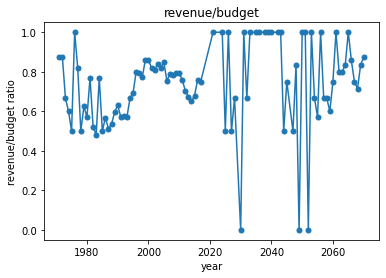

In [13]:
df1['revenue/budget'] = df1['budget']
for i in range(0, df.shape[0]):
    if df1['budget'][i]:
        if df1['budget'][i] != 0:
            df1['revenue/budget'][i] =  df1['budget'][i]/df1['budget'][i]
        else:
            df1['revenue/budget'][i] = 0
        

ax = df1['revenue/budget'].groupby(df1.release_date.dt.year).apply(np.mean).plot(title='revenue/budget',  marker='.', markersize=10,)
ax.set_xlabel("year")
ax.set_ylabel("revenue/budget ratio")

The range of the years seems strange, we have alot of movies for 2020-2070! according to https://stackoverflow.com/a/37766686 python datetime was not correctly determined, we should fix that! we can clearly see the 100 year shift in the movie count plot:

Text(0, 0.5, 'count')

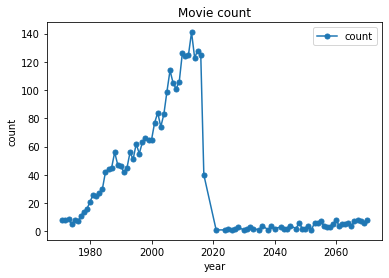

In [14]:
ax = df1['id'].groupby(df1.release_date.dt.year).agg(['count']).plot(title='Movie count',  marker='.', markersize=10,)
ax.set_xlabel("year")
ax.set_ylabel("count")

Using excel, the maximum year in db was 2028, so for years greater than 2028, we subtract 100 years from the parsed dates

In [15]:
from dateutil.relativedelta import relativedelta
import datetime

for i in range(0, df.shape[0]):
    if (df1['release_date'][i]).year > 2028:
        df1.loc[i,"release_date"]= df1.loc[i,"release_date"] - relativedelta(years=100)

Text(0, 0.5, 'revenue/budget ratio')

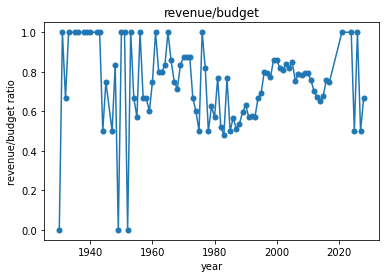

In [16]:
df1['revenue/budget'] = df1['budget']
for i in range(0, df.shape[0]):
    if df1['budget'][i]:
        if df1['budget'][i] != 0:
            df1['revenue/budget'][i] =  df1['budget'][i]/df1['budget'][i]
        else:
            df1['revenue/budget'][i] = 0
        

ax = df1['revenue/budget'].groupby(df1.release_date.dt.year).apply(np.mean).plot(title='revenue/budget',  marker='.', markersize=10,)
ax.set_xlabel("year")
ax.set_ylabel("revenue/budget ratio")

The revenue/budget trend for the years lower than 1980 or higher than 2020 is noisy!
we can see if the number of data is sufficient for that period:

Text(0, 0.5, 'count')

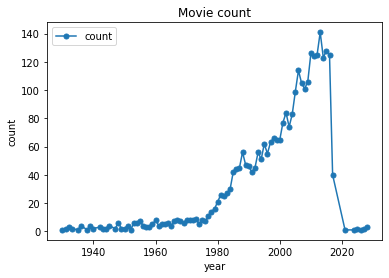

In [17]:
ax = df1['id'].groupby(df1.release_date.dt.year).agg(['count']).plot(title='Movie count',  marker='.', markersize=10,)
ax.set_xlabel("year")
ax.set_ylabel("count")

Exciting! the wiered count from the last Movie count is now fixed, the plot seems integrated and the number of movies were grown steadilly from 1980 to 2020; somehow expected.

As can be seen, we havent enough data for movies in the years lower than 1980 or higher than 2020, so the results for that period is not reliable.

Text(0, 0.5, 'revenue/budget ratio')

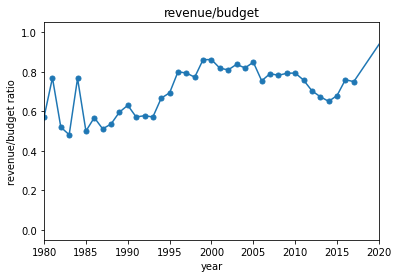

In [18]:
ax = df1['revenue/budget'].groupby(df1.release_date.dt.year).apply(np.mean).plot(title='revenue/budget',  marker='.', markersize=10,)
ax.set_xlabel("year")
ax.set_xlim(1980,2020)
ax.set_ylabel("revenue/budget ratio")

from the plot aboe, the Movies revenue/budget increased from 1980 to 2000, but after 2000 it slowly decreased,
the results correlate well to number of movie tickets sold in the U.S. and Canada from 1980 to 2019 
https://www.statista.com/statistics/187073/tickets-sold-at-the-north-american-box-office-since-1980/

## 5.	Group all movies into different subgroups based on budget, revenue and popularity. (Drop the movies with budget or revenue lower than 10000, these are unknown values) Explain how you choose the number of these groups. Can you provide an explanation about each group?

Without further specifications, the data could be grouped based on max, 95%, 75%, 50%, 25%, 5% and min value as follows:

min - 0.05 : very low

0.05 - 0.25 : low

0.25 - 0.5 : moderatly low

0.5 - 0,75 : moderatly high

0.75 - 0.95 : high

0.95 - max : very high

Using the describe method:

In [19]:
df2 = df1[(df1['revenue']>1000) & (df1['budget']>1000) ]
df2 = df2.drop(columns = ['id', 'revenue/budget'])
df2.describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

,budget,popularity,revenue
count,2163.000,2163.000,2163.000
mean,31228423.024,9.774,87964920.115
std,40374037.973,13.811,156107900.852
min,2500.000,0.003,1404.000
5%,751224.100,0.950,241870.700
25%,5800000.000,5.474,7209218.500
50%,16800000.000,8.348,29541790.000
75%,40000000.000,11.696,100524306.500
95%,110000000.000,18.441,361983304.800
max,380000000.000,294.337,1519557910.000


## 6.	We have some users who like to be different and ‘swim against the current’. Find them the most weird movies in terms of runtime, budget, number of cast, etc. Feel free to improvise and combine the columns! Explain your results.

1. Runtime:

In [20]:
df2 = df1['runtime'].replace(" ", 0)
df2.describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count   3000.000
mean     107.785
std       22.254
min        0.000
5%        83.000
25%       94.000
50%      104.000
75%      118.000
95%      147.000
max      338.000
Name: runtime, dtype: float64

Movies with runtime lower than 83 min or higher than 147 min are considered as the ones who "swim against the current"

Text(0, 0.5, 'runtime')

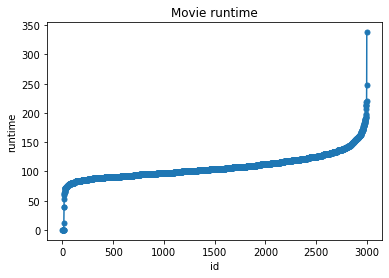

In [21]:
ax = df2.sort_values().plot(title='Movie runtime',  marker='.', markersize=10,use_index=False)
ax.set_xlabel("id")
ax.set_ylabel("runtime")

there are only 2 movies with runtime of over 4 hrs!

2. Budget

In [22]:
df2 = df1[df1['budget']>1000]
df2['budget'].describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count        2173.000
mean     31121554.994
std      40314595.361
min          2500.000
5%         737033.200
25%       5700000.000
50%      16000000.000
75%      40000000.000
95%     110000000.000
max     380000000.000
Name: budget, dtype: float64

Movies with budget lower than 700000 or higher than 110 million $ are considered as the ones who "swim against the current"

Text(0, 0.5, 'budget')

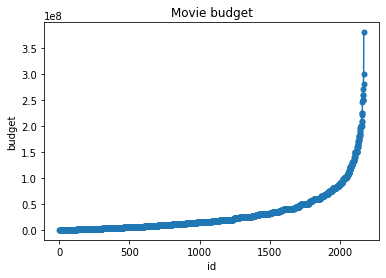

In [23]:
ax = df2['budget'].sort_values().plot(title='Movie budget',  marker='.', markersize=10,use_index=False)
ax.set_xlabel("id")
ax.set_ylabel("budget")

there are only 2 movies with budget of over 300 million $.

3. casts

In [24]:
df1['cast_num'] = df1['id']
for i in range(0, df.shape[0]):
    if type(df1['cast'][i])==list:
        df1['cast_num'][i] = len(df1['cast'][i])
    else:
        df1['cast_num'][i] = 0

In [25]:
df1['cast_num'].describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count   3000.000
mean      20.604
std       16.630
min        0.000
5%         5.000
25%       11.000
50%       16.000
75%       24.000
95%       54.000
max      156.000
Name: cast_num, dtype: float64

Movies with casts lower than 5 or higher than 54 are considered as the ones who "swim against the current"


In [ ]:
ax = df1['cast_num'].sort_values().plot(title='Movie cast',  marker='.', markersize=10,use_index=False)
ax.set_xlabel("id")
ax.set_ylabel("cast number")

there are only 2 movies with casts of over 120.

4. crews

In [ ]:
df1['crew_num'] = df1['id']
for i in range(0, df.shape[0]):
    if type(df1['crew'][i])==list:
        df1['crew_num'][i] = len(df1['crew'][i])
    else:
        df1['crew_num'][i] = 0

In [ ]:
df1['crew_num'].describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

Movies with crews lower than 2 or higher than 88 are considered as the ones who "swim against the current"

In [ ]:
ax = df1['crew_num'].sort_values().plot(title='Movie crew',  marker='.', markersize=10,use_index=False)
ax.set_xlabel("id")
ax.set_ylabel("crew number")

there are only 4 movies with crew of over 160.